![header](https://i.imgur.com/I4ake6d.jpg)

# COPERNICUS MARINE IN SITU ARCTIC TRAINING (4/5)

<div style="text-align: right"><i> 13-04-Part-four-out-of-five </i></div>

***
# ARC `NRT` product/dataset: managing files (profilers)

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***

<h1>Table of Contents<span class="tocSkip"></h1>
<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction">1. Introduction</a></span></li>
        <li>
            <span><a href="#2.-Setup" data-toc-modified-id="2.-Setup">2. Setup</a></span>
            <ul>
                <li><span><a href="#2.1.-Python-packages" data-toc-modified-id="2.1.-Python-packages">2.1. Python packages</a></span></li>
            </ul>
        </li>
        <li><span><a href="#3.-Profilers-(PF)-data" data-toc-modified-id="3.-Profilers-(PF)-data">3. Profilers (PF) data</a></span>
            <ul>
                <li><span><a href="#3.1.-Reading-the-file" data-toc-modified-id="3.1.-Reading-the-file">3.1. Reading the file</a></span></li>
                <li><span><a href="#3.2.-Data-visualization" data-toc-modified-id="3.2.-Data-visualization">3.2. Data visualization</a></span>
                    <ul>
                        <li><span><a href="#3.2.1.-Trajectory-static-map" data-toc-modified-id="3.2.1.-Trajectory-static-map">3.2.1. Trajectory static map</a></span></li>
                <li><span><a href="#3.2.2.-Profiler-Along-track-variable-plot" data-toc-modified-id="3.2.2.-Profiler-Along-track-variable-plot">3.2.2. Profiler Along track variable plot</a></span></li>
               <li><span><a href="#3.2.3.-Profiler-1D-profile-plot" data-toc-modified-id="3.2.3.-Profiler-1D-profile-plot">3.2.3. Profiler 1D profile plot</a></span></li>
               <li><span><a href="#3.2.4.-Profiler-2D-profile-plot" data-toc-modified-id="3.2.4.-Profiler-2D-profile-plot">3.2.4. Profiler 2D profile plot</a></span></li>
               <li><span><a href="#3.2.5.-Profiler-3D-profile-plot" data-toc-modified-id="3.2.5.-Profiler-3D-profile-plot">3.2.5. Profiler 3D profile plot</a></span></li>
                    </ul>
                </li>     
            </ul>
        </li>
        <li><span><a href="#4.-Wrap-up" data-toc-modified-id="4.-Wrap-up">4. Wrap-up</a></span></li>
    </ul>
</div>

## 1. Introduction
[Go back to the "Table of Contents"](#Table-of-Contents)

According to the notebook [13-01-NearRealTtime-product-collections-overview.ipynb](13-01-NearRealTtime-product-collections-overview.ipynb), one of the available data source types is the profilers. Please use the notebook [13-02-NearRealTtime-product-subsetting-download](13-02-NearRealTtime-product-subsetting-download.ipynb) to download some files from profilers ('PF' data type) and let's check its data. <br> If you wanna skip the downloading part you can use the netCDF files available `/data/nc_files/PF/` instead.    

## 2. Setup
[Go back to the "Table of Contents"](#Table-of-Contents)

### 2.1. Python packages

For the notebook to properly run we need to first load the next packages available from the Jupyter Notebook Ecosystem. Please run the `next cell`:

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import datetime
import numpy as np
import xarray
from IPython.display import YouTubeVideo
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.io.img_tiles as cimgt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
%matplotlib inline

<div class="alert alert-block alert-warning">
<b>WARNING</b>
    
***  
If any of them raises any error it means you need to install the module first. For doing so please:
1. Open a new cell int he notebook
2. Run <i>`!conda install packageName --yes`</i> or <i>`!conda install -c conda-forge packageName --yes`</i> or <i>`!pip install packageName`</i>
3. Import again!
<br><br>
Example: <i>how-to-solve import error for json2html module </i>

![region.png](img/errorImporting.gif)

## 3. Profilers (PF) data
[Go back to the "Table of Contents"](#Table-of-Contents)

Profilers are moving platforms with a number of instruments attached to them that submerge and emerge every now and then measuring a number of metocean variables (i.e salinity,temperature, wind..) along the water column. <br>You can get to know better about profilers by watching the following video from IMOS: `run the next cell`

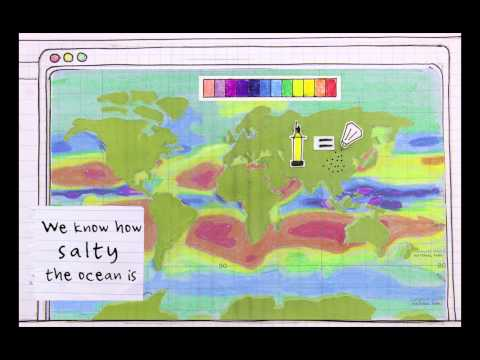

In [2]:
YouTubeVideo('WGbanFvBX38', width="100%", height=500)

Let's see the data of one of the available profilers in the ARC Seas.<br>`Run the next cell` to see the profilers files already available in the /data folder:

In [3]:
dir_PF = os.path.join(os.getcwd(),'data','nc_files','PF') 
os.listdir(dir_PF)

['GL_PR_PF_6902694.nc',
 'GL_PR_PF_4901779.nc',
 'GL_PR_PF_4901809.nc',
 'GL_PR_PF_4901817.nc',
 'GL_PR_PF_6902805.nc',
 'GL_PR_PF_6902800.nc',
 'GL_PR_PF_1901294.nc',
 'GL_PR_PF_6901921.nc',
 'GL_PR_PF_4901133.nc']

### 3.1. Reading the file

`Set one` of the above available `file name` and `run the next cells`:

In [4]:
file = 'GL_PR_PF_6902805.nc'#select one file from the above list
path = os.path.join(dir_PF, file)

In [5]:
ds = xarray.open_dataset(path)
ds.close()
ds

<xarray.Dataset>
Dimensions:                   (DEPTH: 996, LATITUDE: 234, LONGITUDE: 234, POSITION: 234, TIME: 234)
Coordinates:
  * TIME                      (TIME) datetime64[ns] 2017-07-19T19:23:00 ... 2...
  * LATITUDE                  (LATITUDE) float32 56.53 56.54 ... 60.17 60.17
  * LONGITUDE                 (LONGITUDE) float32 -35.02 -35.05 ... -53.22
Dimensions without coordinates: DEPTH, POSITION
Data variables:
    TIME_QC                   (TIME) float32 ...
    POSITION_QC               (POSITION) float32 ...
    DC_REFERENCE              (TIME) object ...
    DATA_MODE                 (TIME) object ...
    DIRECTION                 (TIME) object ...
    VERTICAL_SAMPLING_SCHEME  (TIME) object ...
    PRES                      (TIME, DEPTH) float32 ...
    PRES_QC                   (TIME, DEPTH) float32 ...
    TEMP                      (TIME, DEPTH) float64 ...
    TEMP_QC                   (TIME, DEPTH) float32 ...
    PSAL                      (TIME, DEPTH) float64 ...
    PSAL_QC                   (TIME, DEPTH) float32 ...
    DOX2                      (TIME, DEPTH) float64 ...
    DOX2_QC                   (TIME, DEPTH) float32 ...
    PRES_ADJUSTED             (TIME, DEPTH) float32 ...
    PRES_ADJUSTED_QC          (TIME, DEPTH) float32 ...
    PRES_ADJUSTED_ERROR       (TIME, DEPTH) float32 ...
    TEMP_ADJUSTED             (TIME, DEPTH) float64 ...
    TEMP_ADJUSTED_QC          (TIME, DEPTH) float32 ...
    TEMP_ADJUSTED_ERROR       (TIME, DEPTH) float64 ...
    PSAL_ADJUSTED             (TIME, DEPTH) float64 ...
    PSAL_ADJUSTED_QC          (TIME, DEPTH) float32 ...
    PSAL_ADJUSTED_ERROR       (TIME, DEPTH) float64 ...
    DOX2_ADJUSTED             (TIME, DEPTH) float64 ...
    DOX2_ADJUSTED_QC          (TIME, DEPTH) float32 ...
    DOX2_ADJUSTED_ERROR       (TIME, DEPTH) float64 ...
Attributes:
    data_type:                      OceanSITES vertical profile
    format_version:                 1.2
    platform_code:                  6902805
    date_update:                    2020-10-05T02:00:04Z
    institution:                    IFREMER  Institut Francais de Recherche p...
    institution_edmo_code:          1054
    site_code:                       
    wmo_platform_code:              6902805
    coriolis_platform_code:         6902805
    platform_name:                  PROVOR-CST3 DO Profiling Float
    wmo_inst_type:                  841
    source:                         drifting subsurface profiling float
    source_platform_category_code:  46
    history:                        2020-10-05T02:00:04Z : Creation
    data_mode:                      M
    quality_control_indicator:      6
    quality_index:                  A
    references:                     http://marine.copernicus.eu,http://www.co...
    comment:                         
    Conventions:                    CF-1.6 OceanSITES-Manual-1.2 Copernicus-I...
    netcdf_version:                 netCDF-4 classic model
    title:                          Global Ocean - In Situ Observation Copern...
    summary:                         
    naming_authority:               OceanSITES
    id:                             GL_PR_PF_6902805
    cdm_data_type:                  vertical profile
    family_label:                   profiler-glider
    family_code:                    PF
    area:                           Global Ocean
    geospatial_lat_min:             55.99470
    geospatial_lat_max:             64.20706
    geospatial_lon_min:             -55.61688
    geospatial_lon_max:             -30.74115
    geospatial_vertical_min:        0.00
    geospatial_vertical_max:        2013.00
    time_coverage_start:            2017-07-19T19:23:00Z
    time_coverage_end:              2020-09-23T06:13:30Z
    institution_references:          
    contact:                        codac@ifremer.fr
    author:                         Coriolis and Copernicus data provider
    data_assembly_center:           Coriolis
    pi_name:                    

The above one is an overview of the content of the file: variables, dimensions, coordinates, global attributes...
<br>Let's list now the available variables: `run the next cell`

In [6]:
for var in ds.variables:
    print(var + ':' + ds[var].attrs['long_name'])

TIME:Time
TIME_QC:quality flag
LATITUDE:Latitude of each location
LONGITUDE:Longitude of each location
POSITION_QC:quality flag
DC_REFERENCE:Station/Location unique identifier in data centre
DATA_MODE:Delayed mode or real time data
DIRECTION:Direction of the profiles
VERTICAL_SAMPLING_SCHEME:Vertical sampling scheme
PRES:Sea pressure
PRES_QC:quality flag
TEMP:Sea temperature
TEMP_QC:quality flag
PSAL:Practical salinity
PSAL_QC:quality flag
DOX2:Dissolved oxygen
DOX2_QC:quality flag
PRES_ADJUSTED:Sea pressure adjusted
PRES_ADJUSTED_QC:quality flag
PRES_ADJUSTED_ERROR:Sea pressure adjusted error
TEMP_ADJUSTED:Sea temperature adjusted
TEMP_ADJUSTED_QC:quality flag
TEMP_ADJUSTED_ERROR:Sea temperature adjusted error
PSAL_ADJUSTED:Practical salinity adjusted
PSAL_ADJUSTED_QC:quality flag
PSAL_ADJUSTED_ERROR:Practical salinity adjusted error
DOX2_ADJUSTED:Dissolved oxygen adjusted
DOX2_ADJUSTED_QC:quality flag
DOX2_ADJUSTED_ERROR:Dissolved oxygen adjusted error


In the In Situ TAC netCDFs all variables are linked to another called the same plus '_QC'. This 'twin' variable contains a quality flag for each value in the paired variable.`run the next cell` to check the flag values convention:

In [7]:
pd.DataFrame(data=ds['TEMP_QC'].attrs['flag_values'],
             index=ds['TEMP_QC'].attrs['flag_meanings'].split(' '), columns=['quality flag'])

,quality flag
no_qc_performed,0
good_data,1
probably_good_data,2
bad_data_that_are_potentially_correctable,3
bad_data,4
value_changed,5
not_used,6
nominal_value,7
interpolated_value,8
missing_value,9


Users are recommended to use only the data flagged as 1, the so called 'good data'.<br> Let's then check the available flags for the position to see if we need to get rid of not-good values: `run the next cells`

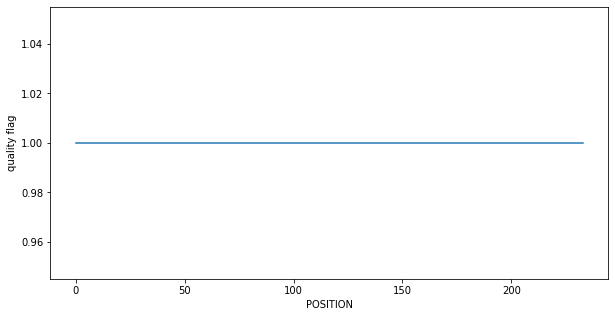

In [8]:
ds['POSITION_QC'].plot(aspect=2, size=5)

In the event of seeing in the above graph values different from 1 (not 'good' values) for any qc variable, a cleaning on the paired variable must be done. **As a good practice, it is recommended to always filter the values of a given variable to retain only the good data and we will do so in the visualization part of this notebook**.

<div class="alert alert-block alert-success">
<b style="margin-right: 2em">CHALLENGE</b> Check a different QC variable!

*** 
Choose something different from the above POSITION_QC and check if there are values different from 'good' (1).

### 3.2. Data visualization

Let's focus on one variable in the data visualization: `run next cell`

In [9]:
param = 'TEMP'
ds[param]

<xarray.DataArray 'TEMP' (TIME: 234, DEPTH: 996)>
[233064 values with dtype=float64]
Coordinates:
  * TIME     (TIME) datetime64[ns] 2017-07-19T19:23:00 ... 2020-09-23T06:13:30
Dimensions without coordinates: DEPTH
Attributes:
    units:          degrees_C
    long_name:      Sea temperature
    standard_name:  sea_water_temperature

Let's load it and the coordinate variables for later use. In this step we will select only the 'good' values: `run next cell`

In [160]:
lats = ds['LATITUDE'].where(ds['POSITION_QC'] == 1).values.tolist()
lats = [i[0] for i in lats]
lons = ds['LONGITUDE'].where(ds['POSITION_QC'] == 1).values.tolist()
lons = [i[1] for i in lons]
times = ds['TIME'].astype('str').where(ds['TIME_QC'] == 1).values.tolist()
parameter = ds[param][:,:].where(ds[param+'_QC'][:,:] == 1)
zaxis = 'DEPH' if 'PRES' not in ds.data_vars else 'PRES'

#### 3.2.1. Trajectory static map

As stated before, the profilers are mobile platforms and therefore it is interesting to plot their tracks.
<br>Let's check the overall trajectory and profiler sampling points: `run the next cell`

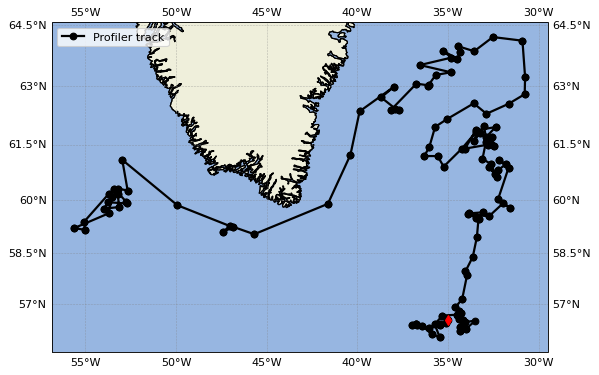

In [11]:
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection=ccrs.Mercator())# Map projection
ax.coastlines(resolution='10m')#adds coastline to map at highest resolution
ax.add_feature(cartopy.feature.OCEAN) #adds coloured ocean
ax.add_feature(cartopy.feature.LAND, edgecolor='black')#adds coloured land
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--') #adding grid lines
#adding profiler track features
plt.plot(lons, lats, color='k', linewidth=2, marker='o',transform=ccrs.Geodetic(),label='Profiler track')#add track line + profiler sampling points
plt.plot([lons[0]], [lats[0]], color='r', linewidth=2, marker='d',transform=ccrs.Geodetic())#Starting point in red
ax.legend()#add legend

#uncomment next lines to save the figure
#figure_name = ds.id+'_track.png'
#plt.savefig(figure_name) 
plt.show()

Too tight? let's zoom out a bit!: `run the next cells`

In [12]:
extent = [-60,-25,65,54]#minX,maxX,#minY,maxY

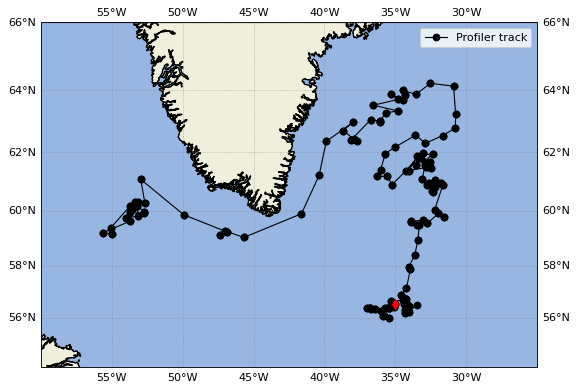

In [13]:
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection=ccrs.Mercator())# Map projection
ax.coastlines(resolution='10m')#adds coastline to map at highest resolution
ax.add_feature(cartopy.feature.OCEAN) #adds coloured ocean
ax.add_feature(cartopy.feature.LAND, edgecolor='black')#adds coloured land
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--') #adding grid lines
plt.plot(lons, lats, color='k', linewidth=1, marker='o',transform=ccrs.Geodetic(),label='Profiler track')#add track line + profiler sampling points
plt.plot([lons[0]], [lats[0]], color='r', linewidth=2, marker='d',transform=ccrs.Geodetic())#Starting point in red
ax.legend()#add legend
ax.set_extent(extent)#personalized limts

#uncomment next lines to save the figure
#figure_name = ds.id+'_track.png'
#plt.savefig(figure_name) 
plt.show()

Let's use tiles instead of features for the background!: `run the next cells`

In [14]:
tile_img = cimgt.StamenTerrain()

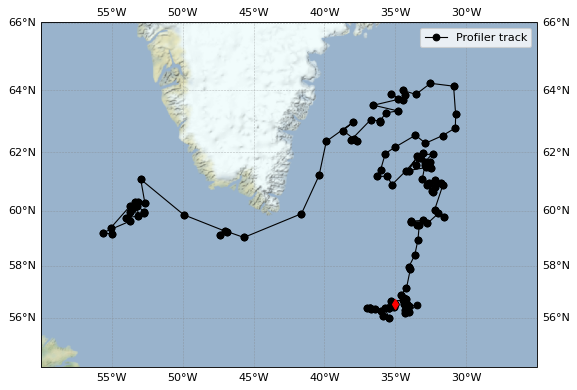

In [15]:
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection=ccrs.Mercator())# Map projection
scale = np.ceil(-np.sqrt(2)*np.log(np.divide((extent[1]-extent[0])/2.0,350.0))) #zoom based on limits
ax.add_image(tile_img,int(scale))#adding google tile
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--') #adding grid lines
plt.plot(lons, lats, color='k', linewidth=1, marker='o',transform=ccrs.Geodetic(),label='Profiler track')#add track line + profiler sampling points
plt.plot([lons[0]], [lats[0]], color='r', linewidth=2, marker='d',transform=ccrs.Geodetic())#Starting point in red
ax.legend()#add legend
ax.set_extent(extent)#personalized limts

#uncomment next lines to save the figure
#figure_name = ds.id+'_track.png'
#plt.savefig(figure_name) 
plt.show()

#### 3.2.2. Profiler Along track variable plot

Let's imagine we are interested in checking how the selected parameter changes depending on the location in the profiler track. Let's get its average value for a given range of depths: `run the next cells`

In [206]:
depths = [0,5] #Set here the depth ranges in meters that you are interested in to get an average of the selected parameter

In [207]:
#setting the colormap
cmap = plt.cm.Spectral_r
norm = colors.Normalize(vmin=np.min(parameter), vmax=np.max(parameter))

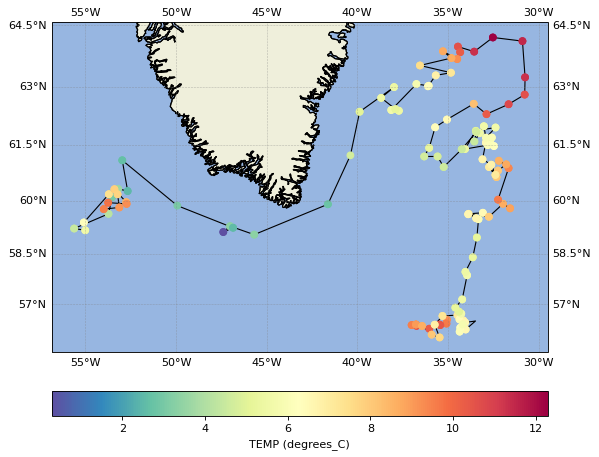

In [208]:
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection=ccrs.Mercator())#map projection
ax.coastlines(resolution='10m')#adds coastline to map at highest resolution
ax.add_feature(cartopy.feature.OCEAN)#adds coloured ocean
ax.add_feature(cartopy.feature.LAND, edgecolor='black')#adding coloured land
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')#adding grid lines
#looping over the available profiles in the subset
depth_range = range(depths[0],depths[1],1)
values,ys,xs = [],[],[]
for j in range(0,len(times)):
        data = parameter.where(ds[zaxis].astype(int).isin(depth_range)).data
        v = np.unique(data[j])
        v = v[~np.isnan(v)].mean()#averaging all values available at such depths
        values.append(v)
        ys.append(lats[j])
        xs.append(lons[j])
plt.plot(xs, ys, color='k', linewidth=1,transform=ccrs.Geodetic(),label='Profiler track', zorder=0)#add track line + profile sampling points
plt.scatter(xs,ys,c=values,cmap=cmap,transform=ccrs.PlateCarree())#adding the coloured scatter points
plt.colorbar(orientation='horizontal', pad=0.08).set_label(param+' ('+ ds[param].units+')')#adding the colorbar

#uncomment next lines to save the figure
#figure_name = ds.id+'_'+param+'_track_at'+str(depth)+'depth.png'
#plt.savefig(figure_name) 
plt.show()

Do you wanna add tick values?: `run the next cell`

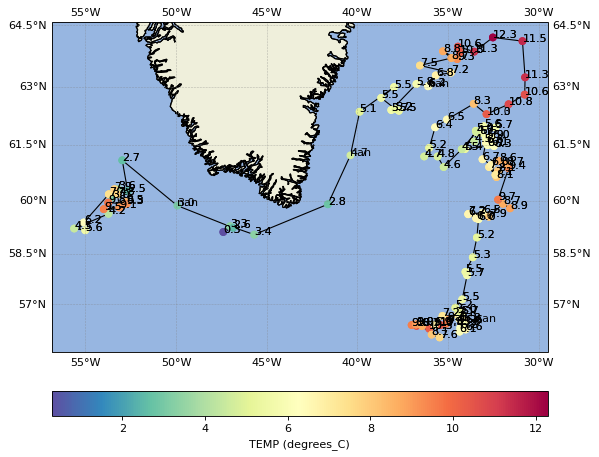

In [209]:
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection=ccrs.Mercator())#map projection
ax.coastlines(resolution='10m')#adds coastline to map at highest resolution
ax.add_feature(cartopy.feature.OCEAN)#adds coloured ocean
ax.add_feature(cartopy.feature.LAND, edgecolor='black')#adding coloured land
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')#adding grid lines
#looping over the available profiles in the subset
depth_range = range(depths[0],depths[1],1)
values,ys,xs = [],[],[]
for j in range(0,len(times)):
        data = parameter.where(ds[zaxis].astype(int).isin(depth_range)).data
        v = np.unique(data[j])
        v = v[~np.isnan(v)].mean()#averaging all values available at such depths
        values.append(v)
        ys.append(lats[j])
        xs.append(lons[j])
        plt.text(lons[j], lats[j], str(np.round(v, 1)),horizontalalignment='left', transform=ccrs.Geodetic())
plt.plot(xs, ys, color='k', linewidth=1,transform=ccrs.Geodetic(),label='Profiler track', zorder=0)#add track line + profile sampling points
plt.scatter(xs,ys,c=values,cmap=cmap,transform=ccrs.PlateCarree())#adding the coloured scatter points
plt.colorbar(orientation='horizontal', pad=0.08).set_label(param+' ('+ ds[param].units+')')#adding the colorbar

<div class="alert alert-block alert-success">
<b style="margin-right: 2em">CHALLENGE!</b>

*** 
Add Try to plot this scatter plot using the extend and background used in the previous section (Statement Terrain)

#### 3.2.3. Profiler 1D profile plot

Let's imagine we are interested in the evolution of the above parameter with depth at a certain location solely.<br>Let's choose one of the profiles and plot it: `run the next cells` 

In [22]:
nprofile = 1

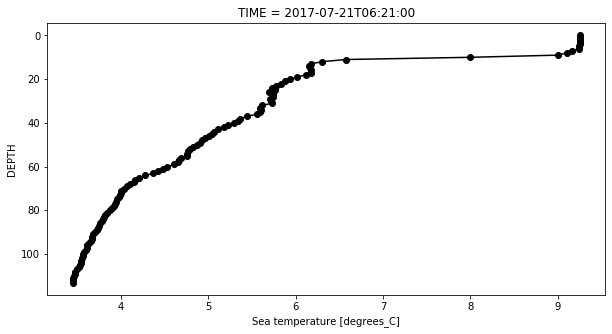

In [23]:
parameter[nprofile,:].plot(aspect=2, size=5, marker='o', color='k', y='DEPTH')
plt.gca().invert_yaxis()

Let's plot all of them together now!: `run the next cells`

Text(0.5, 1.0, 'Profiles series from GL_PR_PF_6902805')

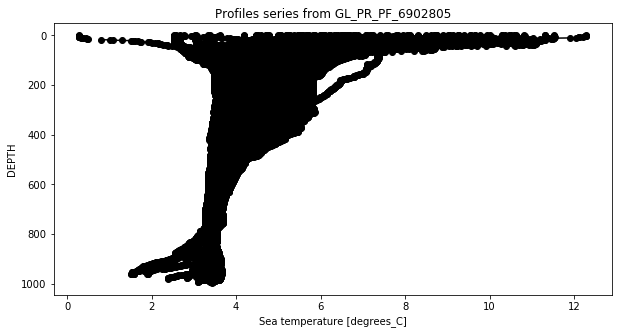

In [24]:
parameter[0,:].plot(aspect=2, size=5, marker='o', color='k', y='DEPTH')
for i in range(1,len(times)):
    parameter[i,:].plot(marker='o', color='k', y='DEPTH')
plt.gca().invert_yaxis()
plt.gca().set_title("Profiles series from %s"%(ds.id))

Let's add some color: `run the next cell`

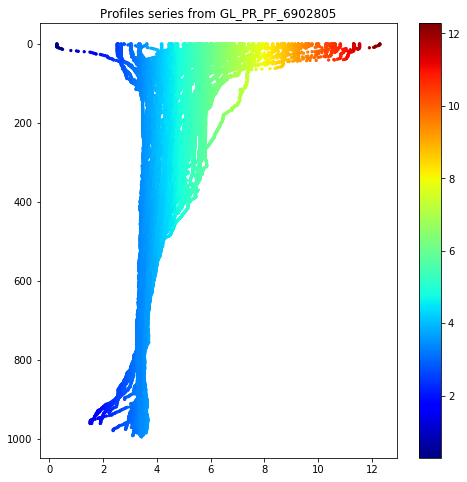

In [25]:
fig = plt.figure(figsize=(8, 8))
plt.scatter(parameter[0,:],ds['DEPTH'][:], s=5, c=parameter[i,:],cmap='jet', norm=norm)
for i in range(1,len(times)):
    plt.scatter(parameter[i,:],ds['DEPTH'][:], s=5, c=parameter[i,:],cmap='jet', norm=norm)
plt.gca().invert_yaxis()
plt.gca().set_title("Profiles series from %s"%(ds.id))
plt.colorbar()

#### 3.2.4. Profiler 2D profile plot

Let's plot now all the profiles over time and depth no matter the location: `run the next cell`

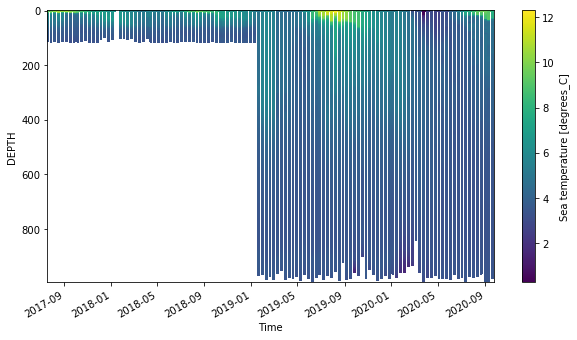

In [27]:
parameter.plot(aspect=2, size=5, y='DEPTH')
plt.gca().invert_yaxis()

#### 3.2.5. Profiler 3D profile plot

Let's imagine we wanna see now the variation of the parameter per location and depth all at once: `run the next cell`

Text(0.5, 0, 'longitude')

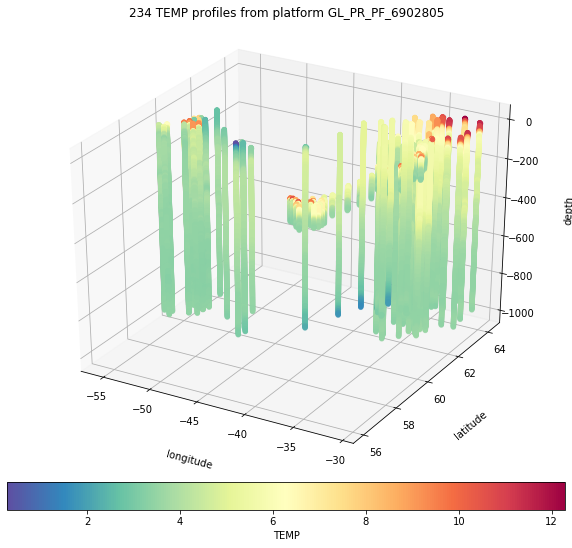

In [28]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
for a in range(0,len(times)-1):
    lat,lon,values = lats[a],lons[a],parameter[a,:].values.tolist()
    depth = (-1*ds['DEPTH']).values.tolist()
    plt.scatter(lon*np.ones(len(depth)), lat*np.ones(len(depth)), zs=depth, zdir='z', s=20, c=values, cmap=cmap, norm=norm)
cbar = plt.colorbar(orientation="horizontal", pad=0.02)
cbar.ax.set_xlabel(param)
ax.set_title(str(len(times))+' '+param+' profiles from platform ' + ds.id, y=1.08)
ax.set_zlabel('depth', labelpad=20, rotation=90)
ax.set_ylabel('latitude', labelpad=20)
ax.set_xlabel('longitude', labelpad=20)
#uncomment the next lines to save the fugure
#png_name =ds.platform_code+'_'+param+'profiles.png'
#plt.savefig(png_name)

***

## 4. Wrap-up
[Go back to the "Table of Contents"](#Table-of-Contents)

So far you should already know how to deal with profile-like data comming from profilers, gliders....<br> `If you don't please ask us! it is the moment!`